In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from collections import defaultdict

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Приведем дату к нужному виду.

In [2]:
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

In [3]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
6,2019-08-07,A,644
13,2019-08-14,A,735
52,2019-08-22,B,650
11,2019-08-12,A,595
50,2019-08-20,B,560


Данные вполне готовы к "употреблению", пропусков нет.

# Часть 1. Приоритизация гипотез.

Посмотрим файл, применим фреймворки 'ICE', 'RICE' для приоритизаций гипотез.

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

In [7]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

In [8]:
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [9]:
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Анализ приоритизаций по ICE, RICE.  
гипотезы ICE:  
  1. Запустить акцию, дающую скидку на товар в день рождения (Влияние 9)  
  2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (Влияние 10)   
  3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.    
  
гипотезы RICE:  
  1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. (Охват пользователей 10)  
  2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. (Охват пользователей 8)  
  3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.  
  
По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

# Часть 2. Анализ А/В теста.

## Кумулятивные метрики

<div class="alert alert-info"> Предположим, что у нас есть пользователи, которые сделали более 1 заказа. И которые, попали одновременно в обе группы. Очевидно, что таким образом, они будут портить нам статистику.</div>

<div class="alert alert-info"> Сформируем группу пользователей с более чем 1 заказом. </div>

In [27]:
multiple_users = orders.groupby(['visitorId', 'group']).size().reset_index()
multiple_users.columns = ['visitorId', 'group', 'count']
multiple_users = multiple_users.query('count > 1').sort_values(by='visitorId')
multiple_users.head(10)

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
108,406208401,B,2
122,457167155,B,3
138,522292794,B,2
158,611059232,A,3
177,678354126,A,2


Формируем словарь "пользователь - группа", в которых он "появлялся" и если одному пользователю принадлежит более 1 значения групп, добавляем его в список danger_users:

In [11]:
potentially_danger_users_list = list(zip(multiple_users['visitorId'], multiple_users['group']))
potentially_danger_users_dict = defaultdict(list)
for user, group in potentially_danger_users_list:
    potentially_danger_users_dict[user].append(group)

danger_users = [user for user in potentially_danger_users_dict if len(potentially_danger_users_dict[user]) > 1]
print('Пользователи, которые видели обе версии сайта: ', ', '.join(str(el) for el in danger_users))

Пользователи, которые видели обе версии сайта:  1230306981, 2038680547, 2378935119, 2458001652, 4256040402


<div class="alert alert-info"> Итак, их было пятеро. Посмотрим, что про них "скажет" датафрейм orders. Что это за пользователи и какие заказы они сделали. </div>

In [13]:
group_counter = orders[['visitorId', 'group']].groupby('visitorId').agg({'group': 'nunique'})
problem_users = group_counter[group_counter['group'] > 1]
print('Количество проблемных пользователей:', len(problem_users))

Количество проблемных пользователей: 58


In [22]:
danger_orders = orders.query('visitorId in @danger_users')
print('Количество строк в датафрейме orders по этим пользователям: {}'.format(danger_orders.shape[0]))
danger_orders_grouped = (danger_orders
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
danger_orders_grouped

Количество строк в датафрейме orders по этим пользователям: 44


transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09  3              18440  
           B     2019-08-09  2              12840  
2038680547 A     2019-08-04  2              4070   
                 2019-08-17  1              3470   
                 2019-08-22  1              760    
                 2019-08-25  1              270    
           B     2019-08-04  1              2800   
                 2019-08-15  1              1680   
                 2019-08-29  1              2420   
2378935119 A     2019-08-10  1              58220  
                 2019-08-15  1              1650   
                 2019-08-17  1              310    
                 2019-08-22  1              3390   
           B     2019-08-09  1              30649  
                 2019-08-10  1              2640   
                 2019-08-25  1              21220  
                 2019-08-28  2              24860  
2458001652 A     2019-08-04  1              340    
                 2019-08-06  1              1620   
                 2019-08-07  1              17379  
                 2019-08-11  1              8280   
                 2019-08-22  1              5190   
           B     2019-08-05  1              2420   
                 2019-08-06  2              14030  
                 2019-08-08  1              5227   
                 2019-08-09  1              5227   
                 2019-08-25  1              2385   
4256040402 A     2019-08-01  1              5800   
                 2019-08-12  1              50     
                 2019-08-17  1              1550   
                 2019-08-20  1              17650  
                 2019-08-23  1              16950  
                 2019-08-27  1              1630   
                 2019-08-31  1              5170   
           B     2019-08-08  1              58220  
                 2019-08-16  1              56650  
                 2019-08-18  1              10970  
                 2019-08-31  1              1850

В связи с этим, создадим копии наших основных датафреймов orders и visitors и в них уберем данные по этим пользователям из датафрейма orders и для корректности из таблицы visitors удалим по 1 посетителю в соответствующих группах и в соответствии с датами, полученными выше. 

In [14]:
orders_filt = orders.query('visitorId not in @danger_users')

Добавим к датафрейму Visitors столбец count, где проставим значение -1, и возьмем только столбцы group, date и count:

In [15]:
danger_orders_grouped = danger_orders_grouped.reset_index()
danger_orders_grouped['count'] = -1
danger_orders_grouped = danger_orders_grouped[['group', 'date', 'count']]
danger_orders_grouped.head()

,group,date,count
0,A,2019-08-09,-1
1,B,2019-08-09,-1
2,A,2019-08-04,-1
3,A,2019-08-17,-1
4,A,2019-08-22,-1


Объединим наш начальный датайфрейм visitors с полученным выше. И добавим новый столбец, где построчно просуммируем значения столбцов visitors и count:

In [16]:
visitors_filt = visitors.merge(danger_orders_grouped, on=['date', 'group'], how='left').fillna(0)
visitors_filt['visitors_'] = visitors_filt['visitors'] + visitors_filt['count']
visitors_filt.head()

,date,group,visitors,count,visitors_
0,2019-08-01,A,719,-1.0,718.0
1,2019-08-02,A,619,0.0,619.0
2,2019-08-03,A,507,0.0,507.0
3,2019-08-04,A,717,-1.0,716.0
4,2019-08-04,A,717,-1.0,716.0


Отбросим старый столбец visitors и вспомогательный столбец count, переименуем новый столбец visitors_ в visitors:

In [17]:
visitors_filt = visitors_filt.drop(['visitors', 'count'], axis=1)
visitors_filt.columns = ['date', 'group', 'visitors']
visitors_filt['visitors'] = visitors_filt['visitors'].astype(int)
visitors_filt.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,716
4,2019-08-04,A,716


Visitors очищен от некорректных данных.

### Построим график кумулятивной выручки по группам.

In [18]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
541,2425764900,3713138051,2019-08-20,2285,B
1089,3237740112,1979878245,2019-08-12,4790,A
997,1941116644,2373765141,2019-08-31,14250,B
148,4238948438,363280180,2019-08-01,300,B
666,2547759316,2803209166,2019-08-29,1250,A


In [19]:
visitors.sample(5)

,date,group,visitors
22,2019-08-23,A,468
45,2019-08-15,B,544
2,2019-08-03,A,507
55,2019-08-25,B,679
29,2019-08-30,A,490


Создаем массив уникальных пар значений дат и групп теста.

In [20]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Получим агрегированные кумулятивные данные по дням.

In [21]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique,\
                                         'revenue':'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [22]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date','group'])

Объединяем данные в одной таблице.

In [23]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [24]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

Построим график выручки по группам.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


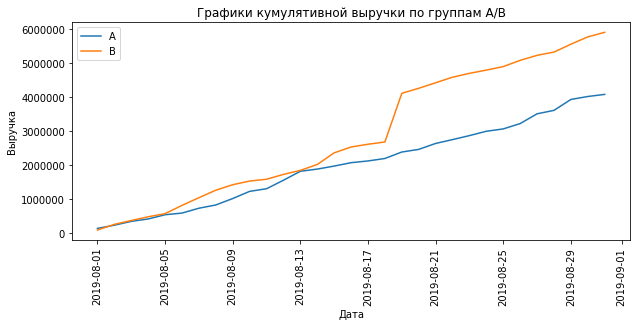

In [25]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Вывод:  
Выручка в группе В стабильно выше, чем в группе А. Но есть точки, где график "скачет". Это может быть большое число заказов, либо единичные, дорогие заказы. Ниже посмотрим, что это такое.

### Построим график среднего чека по группам.  
Разделим кумулятивную выручку на такое же число заказов.

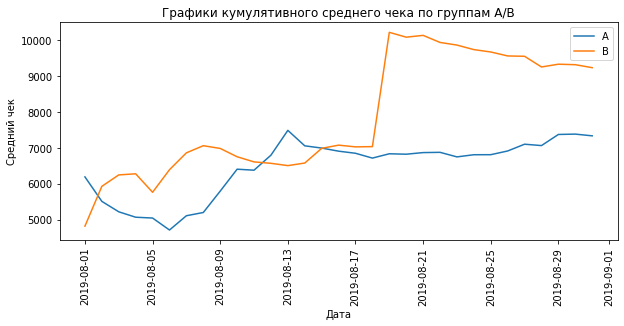

In [26]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Вывод:  
Обычно средний чек в группе В выше, но примерно с половины графика, мы наблюдаем резкие колебания. Возможно они связаны с выбросами.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

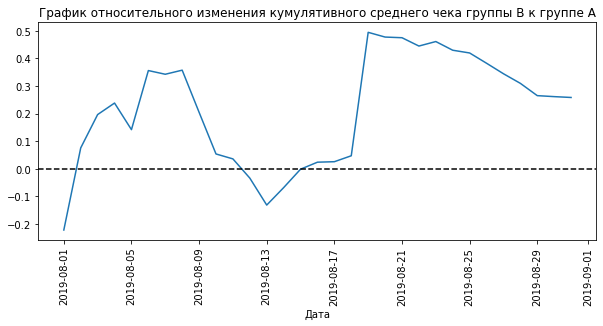

In [27]:
merhedcummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(merhedcummulativeData['date'], ((merhedcummulativeData['revenueB']/merhedcummulativeData['ordersB'])/
                                       (merhedcummulativeData['revenueA']/merhedcummulativeData['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.show()

##### Вывод:  
На графике видим резкие колебания. Где-то спрятались выбросы.

### Построим график кумулятивной конверсии по группам. 

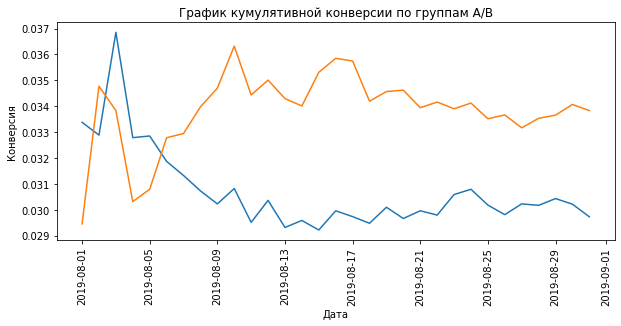

In [28]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=90)
plt.legend
plt.show()

##### Вывод:  
График получился вполне симметричным. Группа В вырвалась вперед и зафиксировалась.

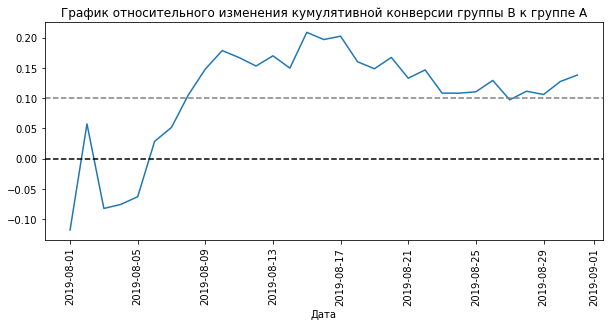

In [29]:
mergedcummulativeConversion = cummulativeDataA[['date', 'conversion']].merge(cummulativeDataB[['date', 'conversion']], \
                                               left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(mergedcummulativeConversion['date'], mergedcummulativeConversion['conversionB']/mergedcummulativeConversion['conversionA']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.show()

##### Вывод:  
После первой недели, конверсия в группе В стабильно лучше группы А.

### Построим точечный график количества заказов по пользователям.

Для начала посмотрим гистограмму распределения количества заказов на одного пользователя.

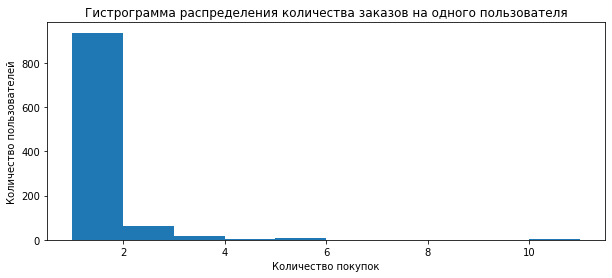

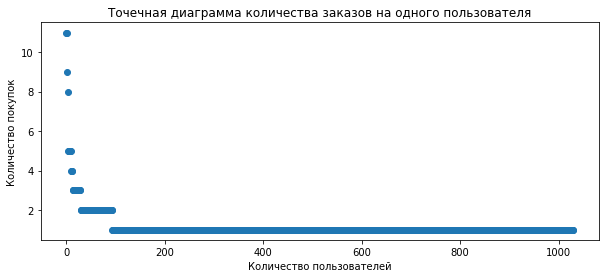

In [30]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество покупок')
plt.ylabel('Количество пользователей')
plt.show()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма количества заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество покупок')
plt.show()

##### Вывод:  
Большинство пользователей делает 1, редко когда, 2 заказа.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [31]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


##### Вывод:
Каки предполагалось, более 2 покупок делают только 5% пользователей.

### Построим точечный график стоимостей заказов.  
Начнем с гистограммы

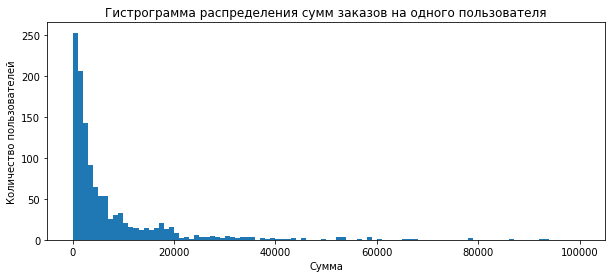

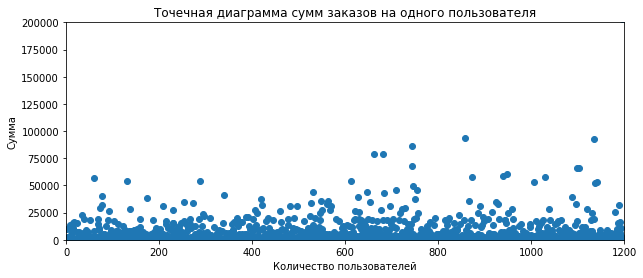

In [32]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.xlabel('Сумма')
plt.ylabel('Количество пользователей')
plt.show()
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма')
plt.axis([0, 1200, 0, 200000])
plt.show()

##### Вывод:
Большинство пользователей ограничивает себя суммой 25-30 т.р. Далее мы это проверим.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [33]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000.000000000004
99: 58233.19999999999


##### Вывод:
Потратить больше 28 т.р. могут себе позволить не более 5% пользователей.

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Хорошо, вторая граница фильтрации определена.
</div>

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

<div class="alert alert-info"> Сформулируем гипотезы.  
alpha = 0.05  
1. Нулевая гипотеза: По "сырым" данным различий в конверсии групп A и B нет! 
2. Альтернативная гипотеза: По "сырым" данным в конверсии групп A и B разница статистически! 
</div>

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


#составим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам 
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "сырым" данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.008396177528376304
По "сырым" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

<div class="alert alert-info"> Сформулируем гипотезы.
alpha = 0.05  
1. Нулевая гипотеза: По "сырым" данным различий в средних чеках групп A и B нет!  
2. Альтернативная гипотеза: По "сырым" данным разница в средних чеках групп A и B разница статистически значима!
</div>

In [35]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным РАЗНИЦА в средних чеках в группах A и B статистически значима!')
else:
    print('По "сырым" данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.3646454927716229
По "сырым" данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!


### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Как мы уже выяснили, что подавляющее большинство пользователей не делает более 2 заказов и сумма 1 покупки в большинстве случаев не превышает 28 т.р. Очистим данные от аномальных пользователей с превышающими данные лимиты значениями.

In [36]:
limit_orders = 2
limit_revenue = 28000
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


<div class="alert alert-info"> Сформулируем гипотезы.
alpha = 0.05  
1. Нулевая гипотеза: По очищенным данным различий в конверсии групп A и B нет!  
2. Альтернативная гипотеза: По очищенным данным в конверсии групп A и B разница статистически значима!
</div>

In [37]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА статистически значима!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B нет!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.006521296371518379
По очищенным данным в конверсии групп A и B РАЗНИЦА статистически значима!


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

<div class="alert alert-info"> Сформулируем гипотезы.
alpha = 0.05  
1. Нулевая гипотеза: По очищенным данным различий в средних чеках групп A и B нет!  
2. Альтернативная гипотеза: По очищенным данным разница в средних чеках групп A и B разница статистически значима!
</div>

In [38]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B статистически значима!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.3692408756572825
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!


### Примем решение по результатам теста.

Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.

Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключили! Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой, что позволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!